In [17]:
%pip install numpy pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time


In [19]:
data = pd.read_csv('slimmed_realestate_data.csv')
data.tail()


,Unnamed: 0,SalePrice,GrLivArea
546,1449,92000,630
547,1456,210000,2073
548,1457,266500,2340
549,1458,142125,1078
550,1459,147500,1256


<Axes: xlabel='GrLivArea'>

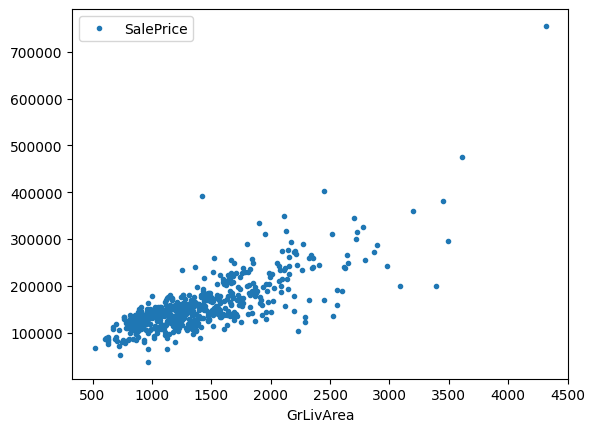

In [20]:
data.plot(x='GrLivArea', y='SalePrice', style='.')

In [21]:
n = len(data)

In [22]:
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

In [23]:
sum_xy = np.sum(x * y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x * x)

In [24]:
denominator = n * sum_x2 - sum_x * sum_x

In [25]:
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator

print('y = %f * x + %f' % (m, b))

m_calc = m
b_calc = b

y = 87.688145 * x + 34754.077892


In [26]:
def plot_data(x, y, m, b, plt=plt):
  plt.plot(x, y, 'bo')

  linear_x = np.arange(x.min(), x.max())
  linear_y = linear_x * m + b
  plt.plot(linear_x, linear_y, 'r-', label='fit')

  plt.xlabel("Ground Living Area")
  plt.ylabel("Saale Price")

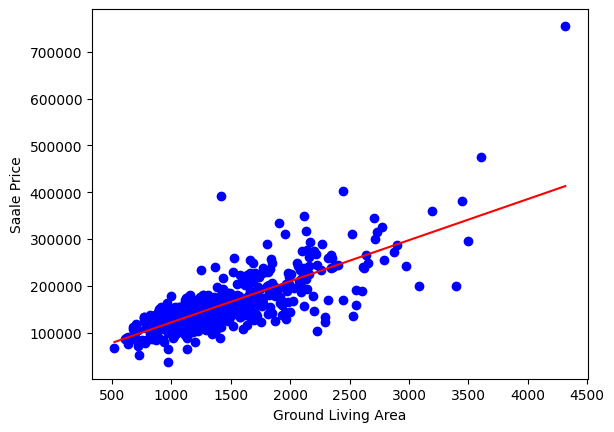

In [27]:
plot_data(x, y, m, b)

In [28]:
def model(x, m, b):
  return m * x + b

In [29]:
def loss(x, y, m, b):
  y_predicted = model(x, m, b)
  return np.power(y - y_predicted, 2)

In [30]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

In [31]:
m = 5.0
b = 1000.0
print('y_i = %.2f * x + %.2f' % (m,b))

y_i = 5.00 * x + 1000.00


In [32]:
l = loss(x,y,m,b)
print('first 10 loss values: ',l[:10])

first 10 loss values:  [3.03421561e+10 3.55511025e+10 1.24579082e+10 1.91656336e+10
 1.60604929e+10 2.04432804e+10 1.72410030e+10 1.76517796e+10
 1.52769600e+10 2.18152900e+10]


In [33]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

y_i = 5.47 * x + 1000.00     previously calculated: y_i = 87.69 * x + 34754.08


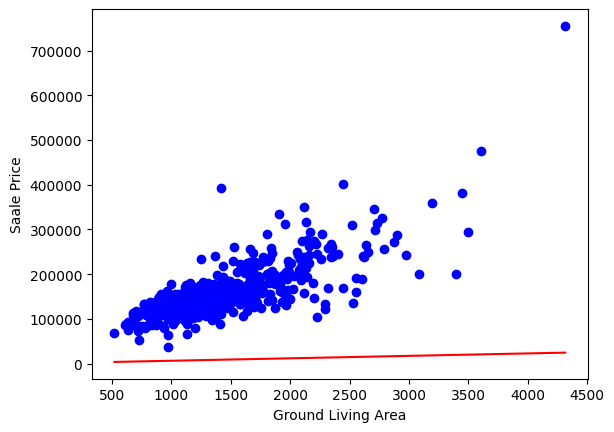

In [34]:
learning_rate = 1e-9
m = updated_m(x,y,m,b,learning_rate)
b = updated_b(x,y,m,b,learning_rate)
print('y_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f' % (m,b,m_calc,b_calc))
plot_data(x,y,m,b)

In [35]:
# set our initial slope and intercept
m = 5.0
b = 1000.0
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []

# we run our loop N times
loop_n_total = 30
loop_start_index = 30
loop_batch_size = 5
for loop in range(loop_start_index,loop_n_total):
   loop -= loop_n_total - loop_start_index
   loop_start_index -= loop_batch_size

   data_smaller_batch = data.sample(loop_batch_size)

   for i in range(loop):

      # convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
      data_x = data_smaller_batch['GrLivArea'].to_numpy()
      data_y = data_smaller_batch['SalePrice'].to_numpy()

      # update our slope and intercept based on the current values
      m = updated_m(data_x,data_y,m,b,learning_rate_m)
      b = updated_b(data_x,data_y,m,b,learning_rate_b)

      # calculate the loss value
      loss_value = np.mean(loss(data_x,data_y,m,b))

      # keep a history of our loss values
      loss_history.append(loss_value)

      # print our progress
      print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))

      # close/delete previous plots
      plt.close('all')

      # create a 1 by 2 plot grid
      fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
      # lot our usual output
      plot_data(data_x,data_y,m,b)

      # here we also plot the calculated linear fit for comparison
      line_x = np.arange(data_x.min(),data_x.max())
      line_y = line_x * m_calc + b_calc
      ax[0].plot(line_x,line_y,'b-',label='calculated')
      # add a legend to the plot and x/y labels
      ax[0].legend()
      ax[0].set_xlabel('square footage')
      ax[0].set_ylabel('sale price')

      # plot the loss
      loss_x = np.arange(0,len(loss_history))
      loss_y = np.asarray(loss_history)
      ax[1].plot(loss_x,loss_y, 'o-')
      ax[1].set_yscale('log')
      ax[1].set_xlabel('loop step')
      ax[1].set_ylabel('loss')
      plt.show()
      # gives us time to see the plot
      time.sleep(2.5)
      # clears the plot when the next plot is ready to show.
      ipydis.clear_output(wait=True)